
**Goal -** To build a model that predicts whether or not an employee will leave the company.

# 1. Importing the Libraries

In [1]:
# operational/data manipulation packages
import numpy as np 
import pandas as pd 

# modules for data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# visualization package 
import matplotlib.pyplot as plt
import seaborn as sns

# importing important functions from sklearn package
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import plot_tree

# package for saving models
import pickle

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/salifort-motors/HR_capstone_dataset.csv


# 2. Importing the Dataset

In [2]:
data = pd.read_csv('/kaggle/input/salifort-motors/HR_capstone_dataset.csv')

# 3. Data Exploration

In [3]:
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
data.shape

(14999, 10)

Displaying basic information about the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Displaying descriptive statistic 

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# 4. Data cleaning

In [7]:
# Finding missing values
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

There are no missing values in the dataset.

In [8]:
# checking for duplicate rows
data.duplicated().sum()

3008

Out of 14999, there are 3008 duplicates, approximately 20% of the total. We need to first inspect the rows containing duplicate values to understand the situation.

In [9]:
data[data.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


Given that most variables are continuous, it's highly unlikely for two or more employees to have reported the exact same answers for all the questions. Hence, we will proceed by dropping these duplicate entries.

In [10]:
df = data.drop_duplicates(keep = 'first')
# Verifying whether the duplicates have been eliminated or not.
df.shape

(11991, 10)

In [11]:
#Verifying whether the column names contain any misspelling or improper standard naming conventions.
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

**Standardizing the column names**

Most of the columns adhere to the 'snake-case' convention. As a result, we will convert all columns to this convention. Additionally, we will rename the 'time_spend_company' column to 'tenure', where "tenure" refers to the duration (in years) an employee has spent at the company.

In [12]:
df = df.rename(columns = {
    'Work_accident' : 'work_accident',
    'Department' : 'department',
    'time_spend_company' : 'tenure',
    'average_montly_hours' : 'average_monthly_hours'
})

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

**Detecting Outliers**

Most of the columns contain either binary values (0 and 1) or continuous values between 0 and 1. As a result, these columns are resilient against outliers. Now, we need to focus on the 'average_monthly_hours', 'tenure', and 'number of projects' columns. We should examine these columns for the presence of outliers.

**1. 'Tenure' Variable**

Text(0, 0.5, 'Tenure')

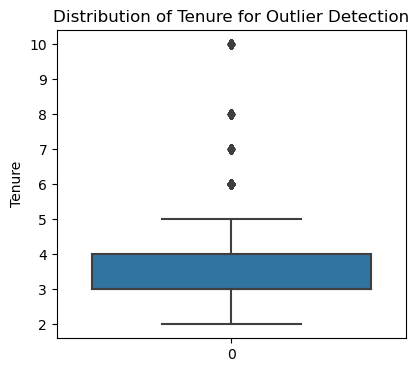

In [13]:
# using boxplot to visualize distribution of `tenure` and detect any outliers.
plt.figure(figsize=(4.5,4))
sns.boxplot(df['tenure'])
plt.title("Distribution of Tenure for Outlier Detection")
plt.ylabel("Tenure")

The boxplot reveals the existence of outliers in the 'tenure' variable. Next, we will determine the number of rows that contain these outliers.

In [14]:
# determining upper and lower quartile and IQR
q1 = df['tenure'].quantile(0.25)
q3 = df['tenure'].quantile(0.75)
iqr = q3-q1

# computing the upper and lower limits beyond which values are classified as outliers
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)

outlier = df[(df['tenure'] < lower_limit) | (df['tenure'] >  upper_limit)]
print("Q1 : ", q1)
print("Q3 : ", q3)
print("Number of rows containing outliers - ", len(outlier))

Q1 :  3.0
Q3 :  4.0
Number of rows containing outliers -  824


We have successfully detected the outliers for the tenure variable. It's important to note that certain models are more sensitive to outliers than others. Therefore, after performing EDA and selecting our model, we will need to determine the appropriate approach for handling the outliers.

**2. Number of projects**

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64


Text(0.5, 1.0, 'Distribution of number of projects')

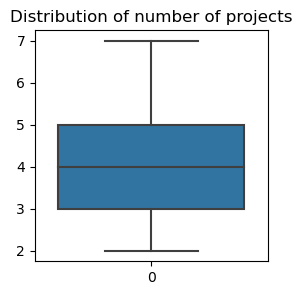

In [15]:
# count of the number of projects an employee has
print(df['number_project'].value_counts())

plt.figure(figsize=(3,3))
sns.boxplot(df['number_project'])
plt.title('Distribution of number of projects')

No outliers are present in the 'number_project' variable.

**3. Average Monthly Hours**

<Axes: title={'center': 'Distribution of average_monthly_hours'}>

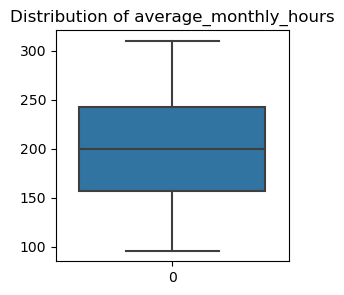

In [16]:
plt.figure(figsize=(3,3))
plt.title("Distribution of average_monthly_hours")
sns.boxplot(df['average_monthly_hours'])

No outliers are present in the 'average_monthly_hours' variable as well.

# 5. Exploratory Data Analysis

In [17]:
# number of people who have left(1) the company vs stayed(0) 
print(df['left'].value_counts(), "\n")
print(df['left'].value_counts(normalize = True))
print("\nOut of a total of 11991 individuals, approximately 16.6% (1991) have left the company, while around 83.4% (10000) have opted to stay.")

0    10000
1     1991
Name: left, dtype: int64 

0    0.833959
1    0.166041
Name: left, dtype: float64

Out of a total of 11991 individuals, approximately 16.6% (1991) have left the company, while around 83.4% (10000) have opted to stay.


Now, We intend to compare the number of projects between employees who have left the company and those who are currently employed. 

<Axes: title={'center': 'Number of projects - Histogram'}, xlabel='number_project', ylabel='Count'>

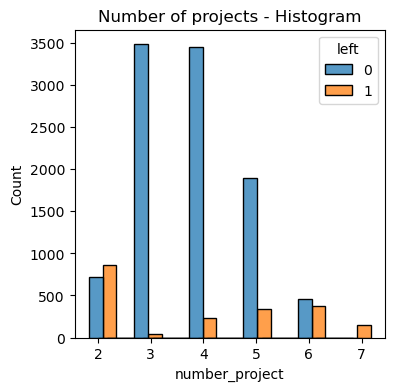

In [18]:
plt.figure(figsize=(4,4))
plt.title("Number of projects - Histogram")
sns.histplot(data = df, x = 'number_project', hue = 'left', multiple = 'dodge', shrink = 3)


Employees who have either too few or too many projects face a greater chance of leaving the company. It's worth noting that employees with very few projects could be in a situation where they've been either laid off by the company or have already handed in their resignation. Therefore, they were assigned fewer tasks. On an average, employees typically handle around 3.8 projects, which falls within the range of 3 to 4. Remarkably, individuals working within this project range are more inclined to stay with the company.

**Creating a stacked boxplot showing average_monthly_hours distributions for number_project, comparing the distributions of employees who stayed versus those who left.**

<Axes: xlabel='number_project', ylabel='average_monthly_hours'>

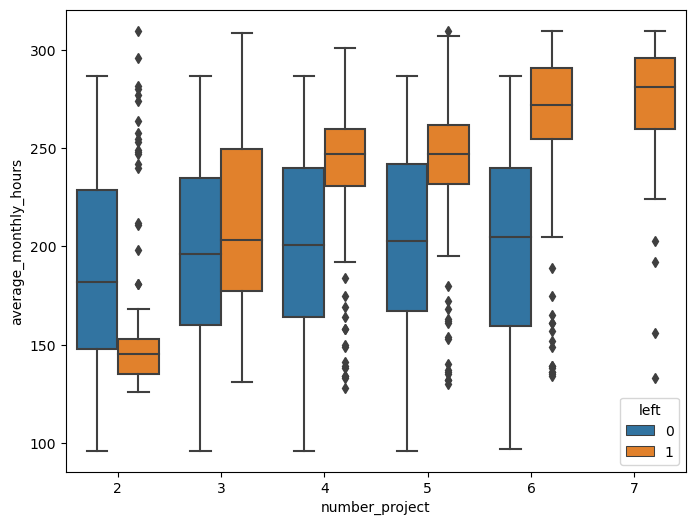

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df, x = 'number_project', y = 'average_monthly_hours', hue = 'left')

- Regardless of the number of projects, employees who left the company were working more than the current employees, except in the case of employees with 2 projects.

- If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.

In [20]:
# Verifying whether all the employees with 7 projects have left the company.
df[df['number_project'] == 7].value_counts('left')

left
1    145
dtype: int64

This confirms that all employees with 7 projects did leave the company.

**Examining the average monthly hours versus the satisfaction levels.**

Text(0.5, 1.0, 'Monthly hours by satisfaction Level')

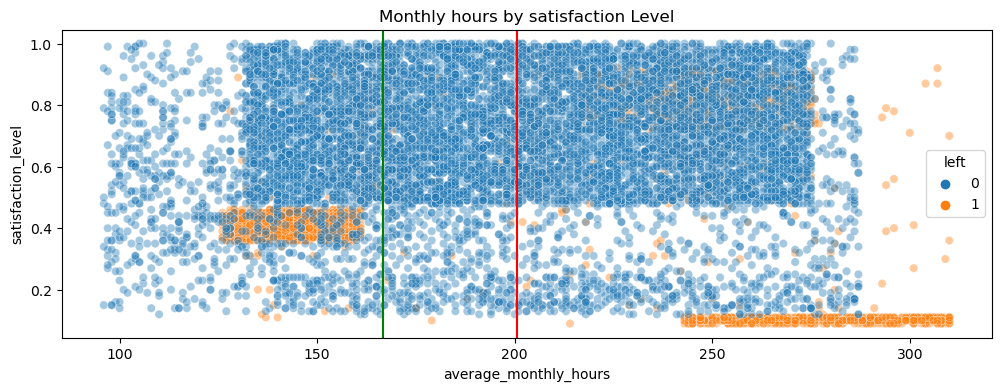

In [21]:
plt.figure(figsize = (12,4))
sns.scatterplot(data = df, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.4)
plt.axvline(x = df['average_monthly_hours'].mean(), color = 'red', label = 'mean_avg_hrs')
plt.axvline(x = 166.67, color = 'Green', label = '166.67 hr/month')
plt.title("Monthly hours by satisfaction Level")

- The 'red line' indicates the mean of average_monthly_hours, while the green line represents the previously calculated typical working hours.

- The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

- The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

- Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

**Examining the tenure versus the satisfaction levels.**

<Axes: xlabel='tenure', ylabel='Count'>

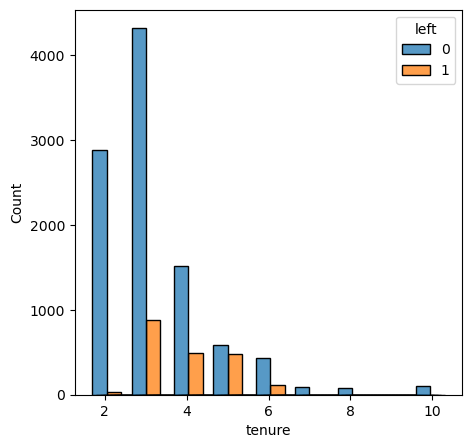

In [22]:
# histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
plt.figure(figsize=(5,5))
sns.histplot(x = df['tenure'], hue = df['left'], multiple = 'dodge', shrink = 8)

The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

<Axes: xlabel='tenure', ylabel='satisfaction_level'>

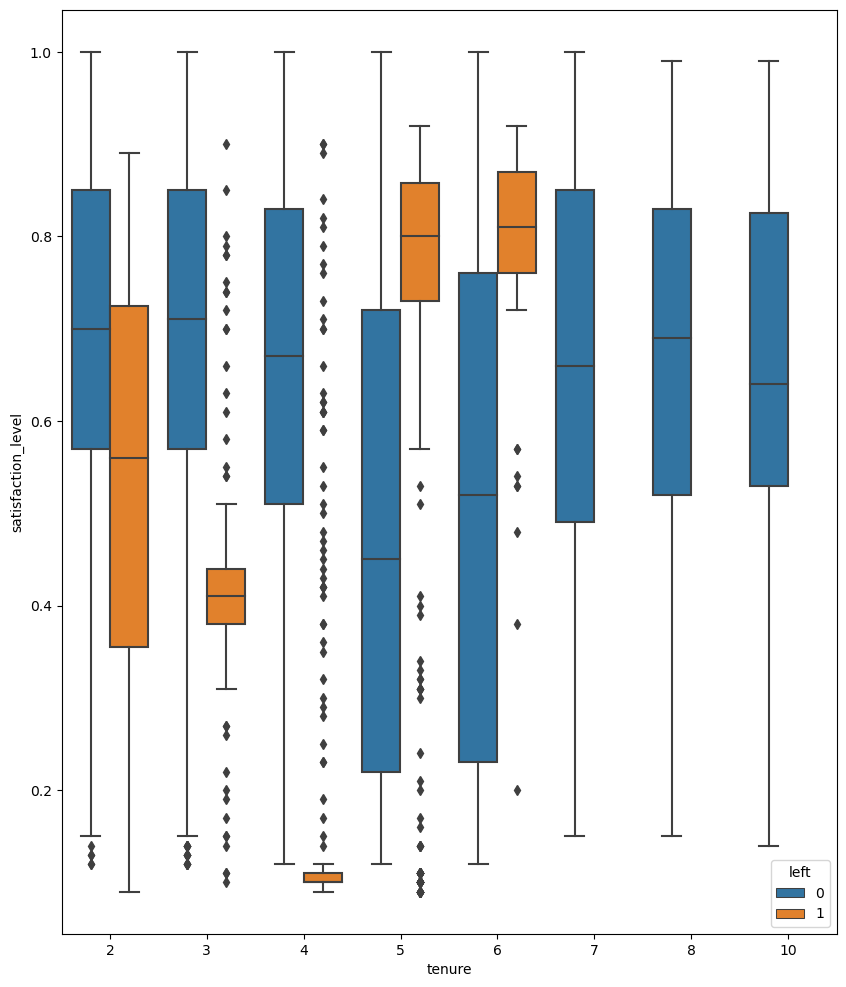

In [23]:
plt.figure(figsize = (10,12))
sns.boxplot(data = df, x = 'tenure', y = 'satisfaction_level', hue = 'left')

- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.

In [24]:
# mean and median satisfaction scores of employees who left and those who stayed
df.groupby('left')['satisfaction_level'].agg([np.mean, np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

In [25]:
# examining salary levels for different tenures.
print(df.groupby('tenure')['salary'].count())

tenure
2     2910
3     5190
4     2005
5     1062
6      542
7       94
8       81
10     107
Name: salary, dtype: int64


It is evident that individuals with a tenure of more than 7 have a relatively low count. This will make it challenging to distinctly observe the count of employees across different salary groups in a visualization. To address this, we will divide the data into two segments: employees with long tenures and those with short tenures.

<Axes: title={'center': 'Salary distribution of long-tenured people'}, xlabel='tenure', ylabel='Count'>

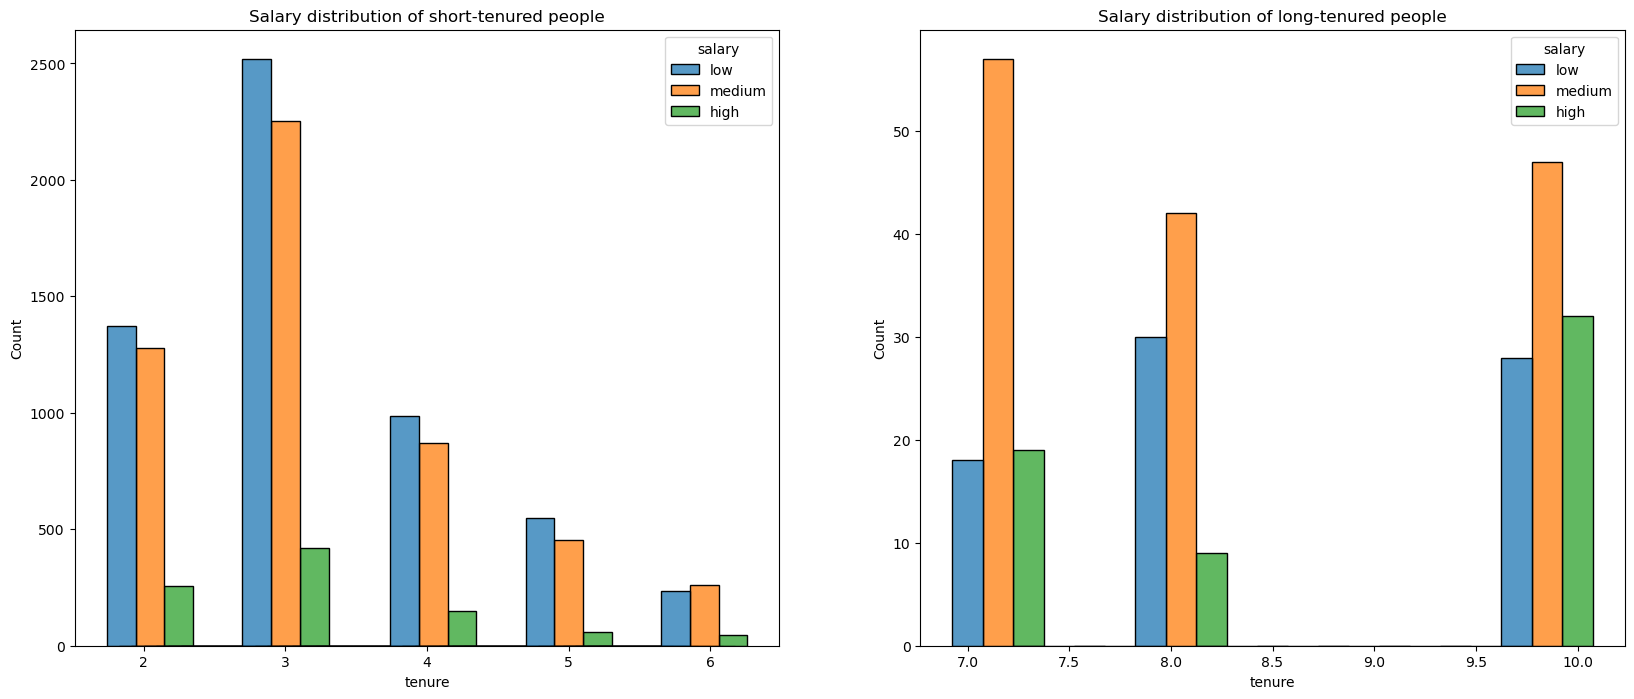

In [26]:
short_tenured = df[df['tenure'] < 7]
long_tenured = df[df['tenure'] > 6]

fig, ax = plt.subplots(1,2, figsize = (20,8))

ax[0].set_title("Salary distribution of short-tenured people")
sns.histplot(data = short_tenured, x = 'tenure', hue = 'salary', ax = ax[0], shrink = 7, multiple = 'dodge',
            hue_order = ['low', 'medium', 'high'])

ax[1].set_title("Salary distribution of long-tenured people")
sns.histplot(data = long_tenured, x = 'tenure', hue = 'salary', multiple = 'dodge', shrink = 1.5, ax = ax[1],
            hue_order = ['low', 'medium', 'high'])

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

Now let's explore whether there's a correlation between working long hours and receiving high evaluation scores. 

<Axes: title={'center': 'Average Monthly Hours by Last Evaluation'}, xlabel='average_monthly_hours', ylabel='last_evaluation'>

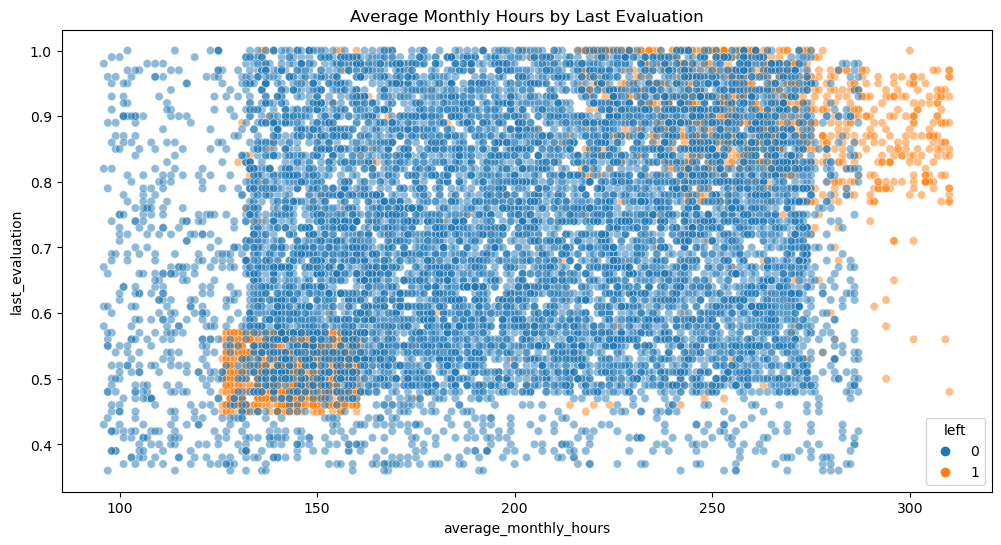

In [27]:
plt.figure(figsize = (12,6))
plt.title('Average Monthly Hours by Last Evaluation')
sns.scatterplot(data = df, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.5)

- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.
- There seems to be a correlation between hours worked and evaluation score.
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

**Examining whether employees who worked very long hours were promoted in the last five years.**

In [28]:
df.groupby(['average_monthly_hours']).agg({
    'left' : 'sum',
    'promotion_last_5years' : 'count'
})

,left,promotion_last_5years
average_monthly_hours,,
96,0,6
97,0,13
98,0,20
99,0,11
100,0,17
...,...,...
306,8,8
307,10,10
308,10,10


<Axes: xlabel='average_monthly_hours', ylabel='promotion_last_5years'>

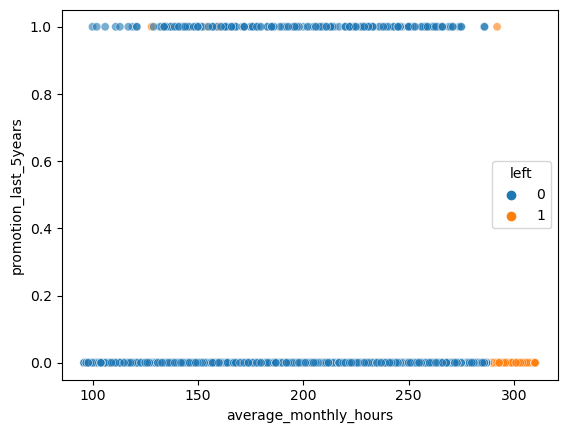

In [29]:
sns.scatterplot(data = df, x = 'average_monthly_hours', y = 'promotion_last_5years', alpha = 0.6, hue = 'left')

The plot above shows the following:

- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours

**How the employees who left are distributed across departments.**

In [30]:
df['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

Text(0.5, 1.0, 'Count of Stayed/Left by department')

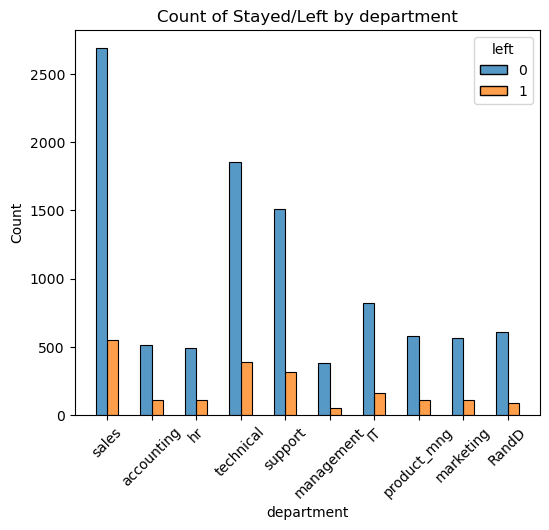

In [31]:
plt.figure(figsize = (6,5))
sns.histplot(data = df, x = 'department', multiple = 'dodge', hue = 'left', shrink = 0.5)
plt.xticks(rotation = 45)
plt.title('Count of Stayed/Left by department')

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

check for strong correlations between variables in the data

1 . using heatmap                                                                                                             
2. using pairplot

/tmp/ipykernel_20/2069937806.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmax = 1, vmin = -1, annot = True, cmap = sns.color_palette("Greens",12))


Text(0.5, 1.0, 'Correlation Heatmap')

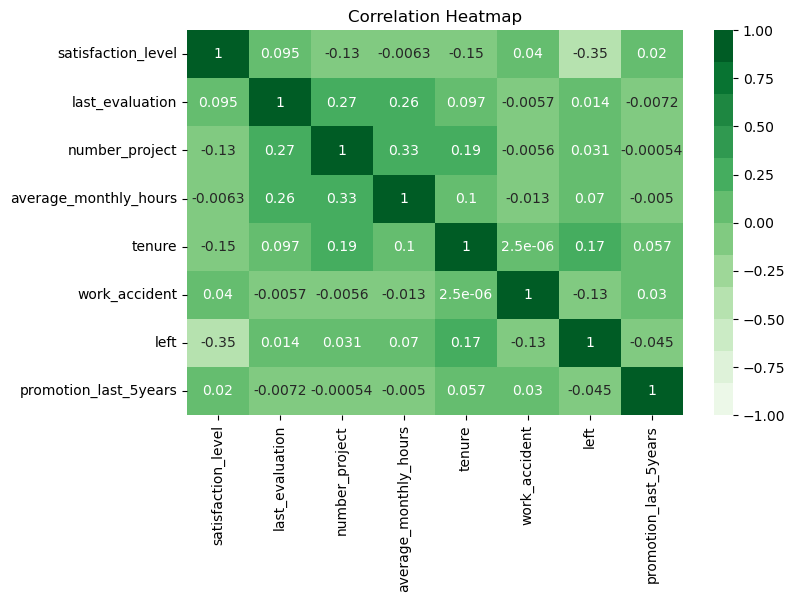

In [32]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), vmax = 1, vmin = -1, annot = True, cmap = sns.color_palette("Greens",12))
plt.title("Correlation Heatmap")

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


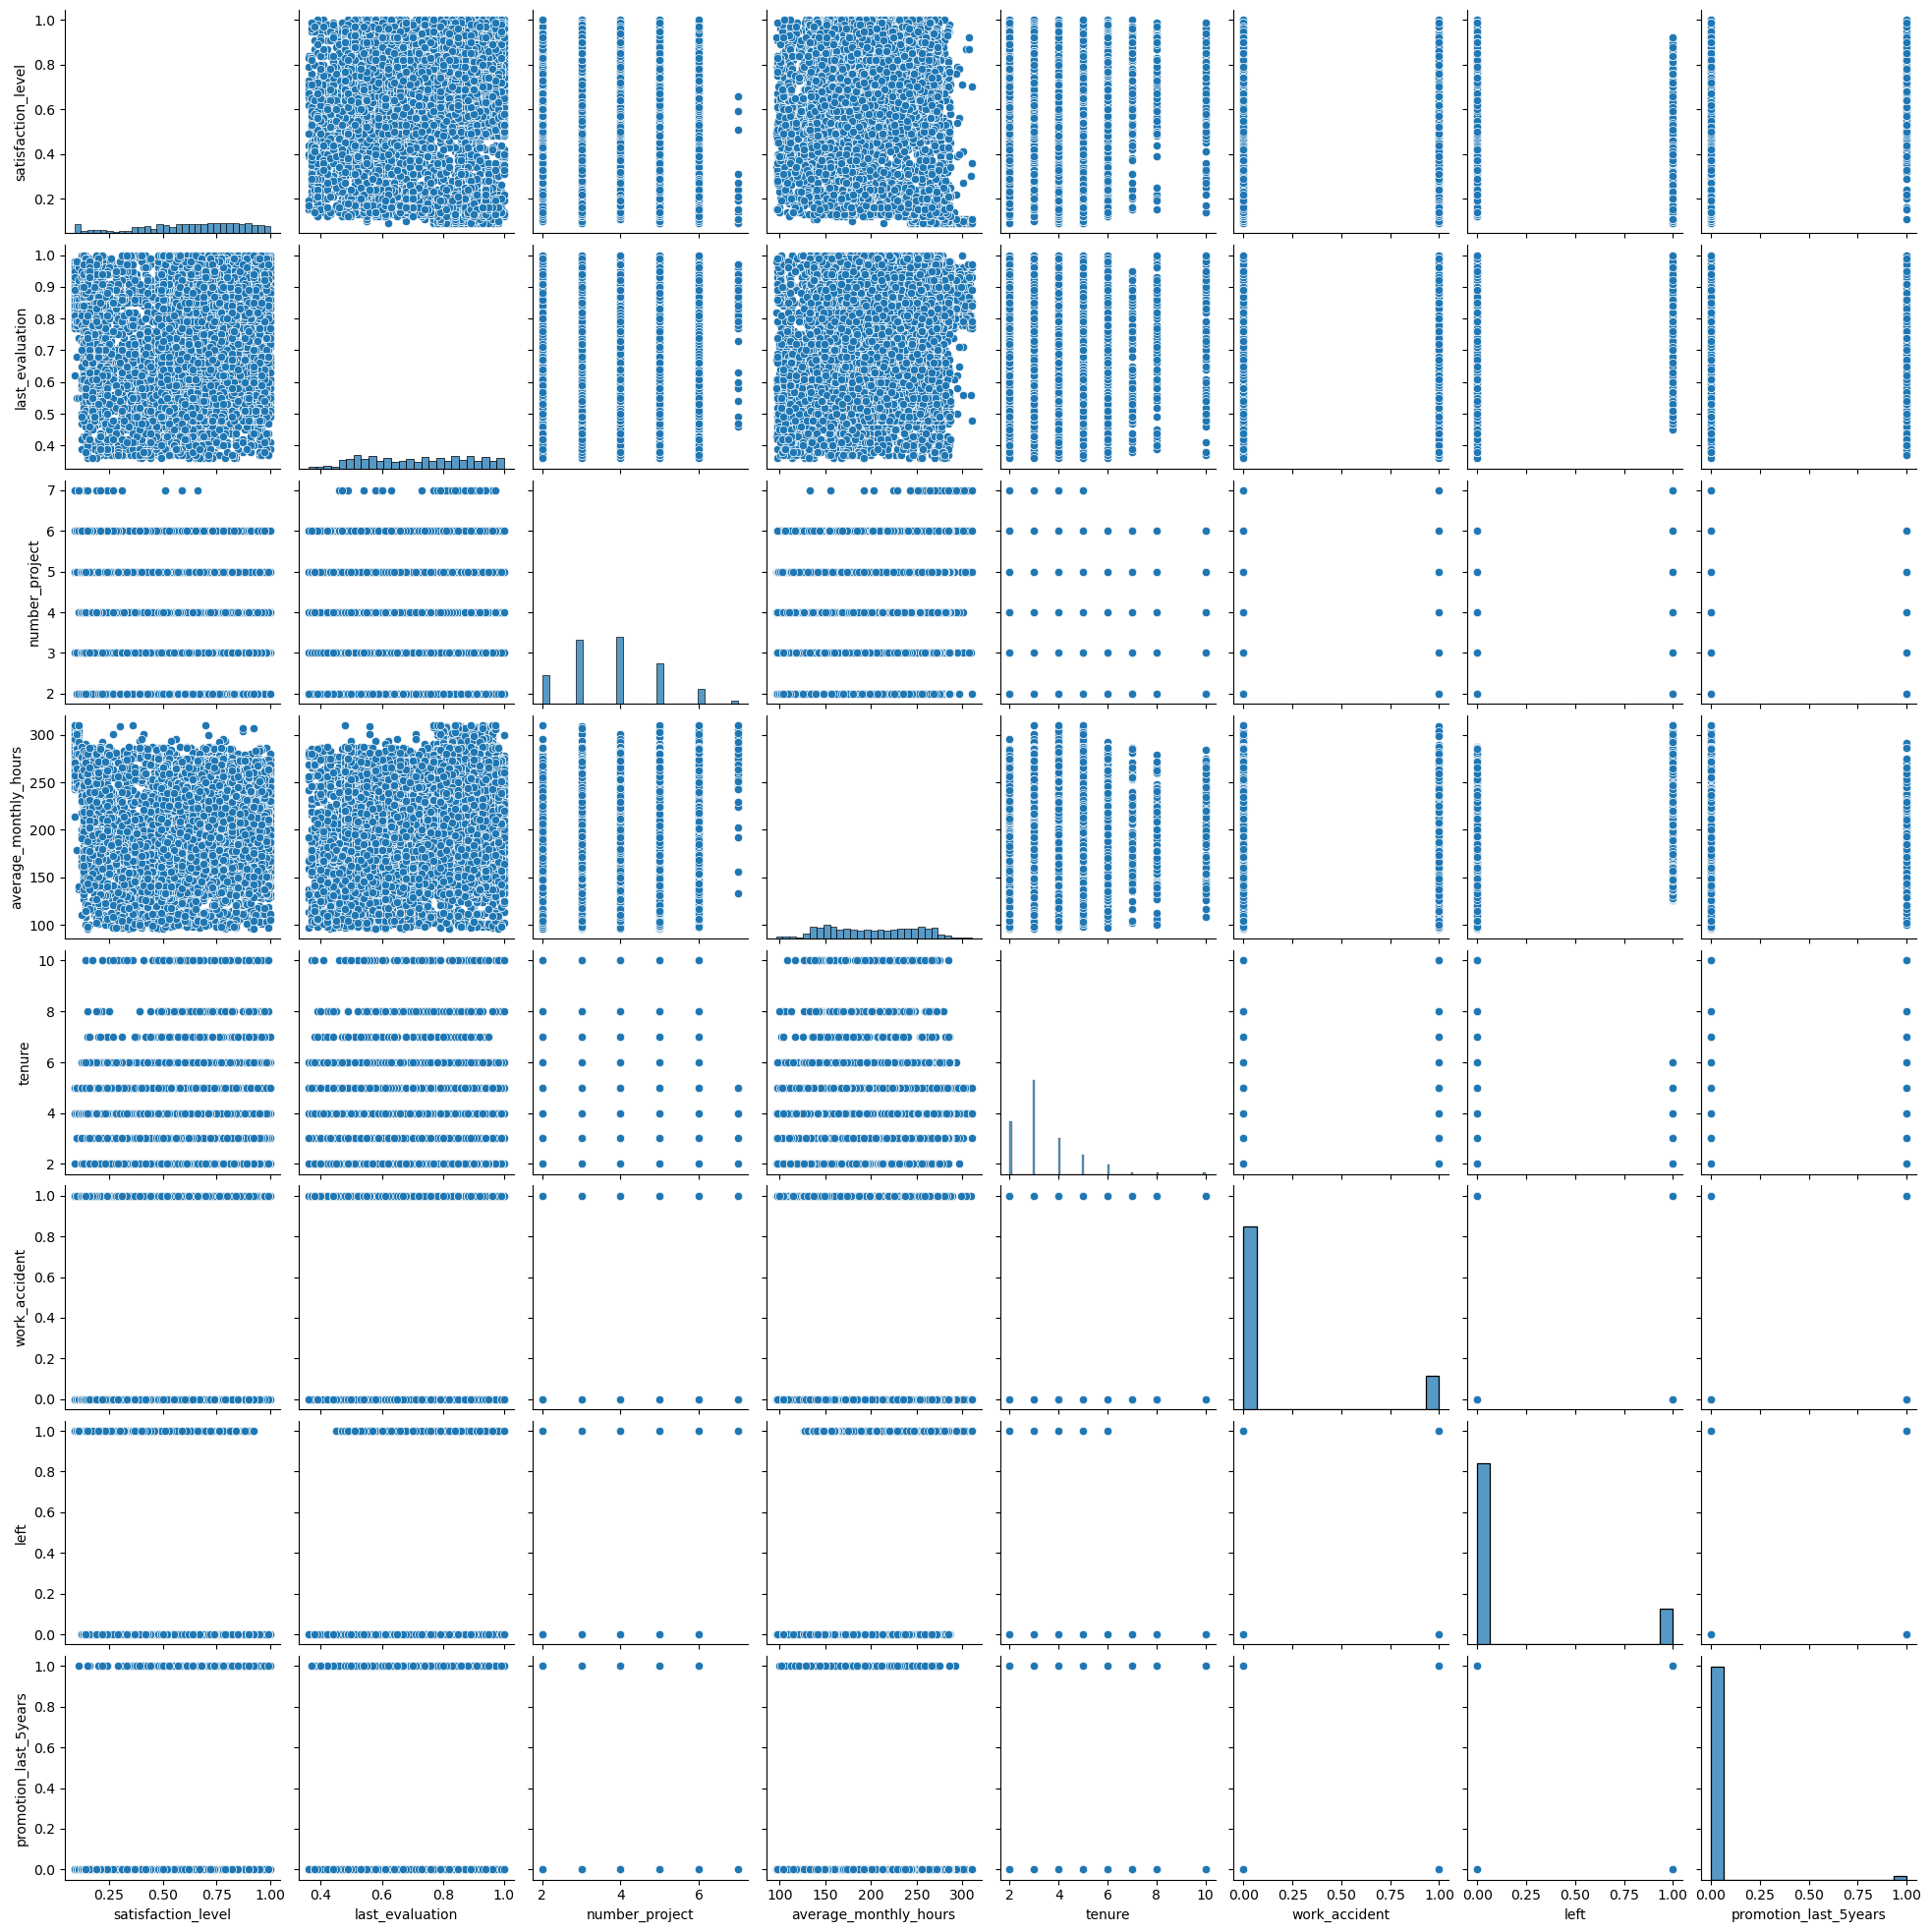

In [33]:
sns.pairplot(df)

# 6. Insights of EDA

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# 7. Identify the model type

As the outcome variable (whether an employee leaves the company) is categorical, we can either build a Logistic Regression model or a Tree-based Machine Learning model. We will build both models and compare their performances.

For our tree-based modeling,we will be implementing random forest. Since, decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions.

# 8. Logistic Regression - Model Building

**8.1 Logistic Regression model assumptions**

- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

Our dataset satisfies all the assumptions of a logistic regression model. Consequently, we will move forward with the binary logistic regression model.

**8.2 Encode the non-numeric variables: department and salary**

In [34]:
df_enc = df.copy()

# Encode the `salary` column as an ordinal numeric category instead of dummy
df_enc['salary'] = (df_enc['salary'].astype('category')
                    .cat.set_categories(['low', 'medium', 'high'])
                    .cat.codes)

df_enc = pd.get_dummies(df_enc, drop_first = True)
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [35]:
df_enc.shape

(11991, 18)

Creating a heatmap to visualize the correlations among the variables of interest.

Text(0.5, 1.0, 'Heatmap of Variables of Interest')

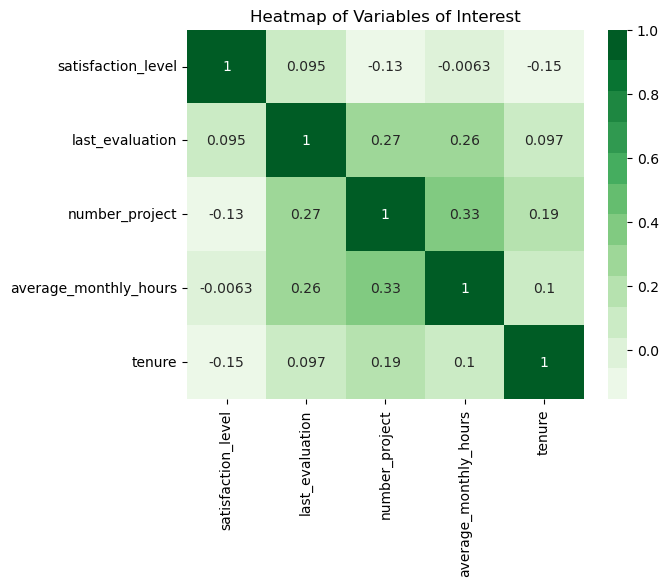

In [36]:
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(),
           annot = True, cmap = sns.color_palette('Greens', 12))
plt.title("Heatmap of Variables of Interest")

Logistic Regression is sensitive to outliers, and as we discovered earlier, the 'tenure' variable contains outliers. Thus, it's necessary to remove these outliers before moving forward.

In [37]:
df_lor = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <=  upper_limit)]
df_lor.shape

(11167, 18)

In [38]:
# define the outcome variable
y = df_lor['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [39]:
# define the  model feature
x = df_lor.copy()
x = df_lor.drop('left', axis = 1)
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
# split the variables into training and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 42)

In [41]:
# construct a model and fit it into the training dataset
lor_clf = LogisticRegression(random_state = 42, max_iter = 500)
lor_clf.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

# 9. Testing the Logistic regression Model

In [42]:
# predict the outcome variable using test set
y_pred = lor_clf.predict(X_test)

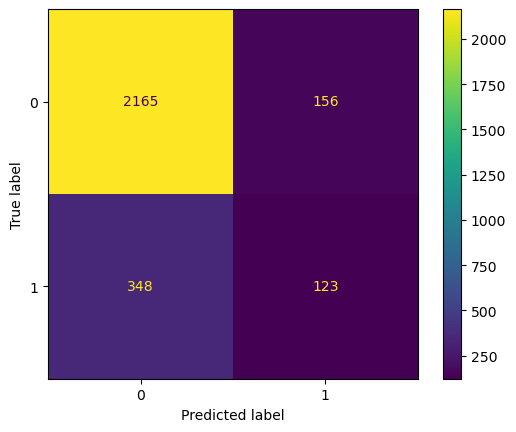

In [43]:
# creating a confusion matrix to visualize the results of the logistic regression model
lor_cm = confusion_matrix(y_test, y_pred, labels = lor_clf.classes_)

lor_disp = ConfusionMatrixDisplay(confusion_matrix = lor_cm, display_labels = lor_clf.classes_)
lor_disp.plot()

We need to examine the class balance within the data. As this is a binary classification task, the class balance affects how we interpret accuracy metrics.

In [44]:
df_lor['left'].value_counts(normalize = True)

0    0.831468
1    0.168532
Name: left, dtype: float64

The split is approximately 83% to 17%. While the data isn't perfectly balanced, it's not extremely imbalanced either. Hence, we can work with this data without adjusting the class balance and proceed with evaluating the model.

In [45]:
#Creating a classifying report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names = target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.


# 10. Random Forest - Model Building 

In [46]:
rf = RandomForestClassifier(random_state = 0)

# hyperparameters to search over
cv_params = {'max_depth' : [3,5,None],
            'max_features' : [1.0],
            'max_samples' : [0.7, 1.0],
            'min_samples_leaf' : [1,2,3],
            'min_samples_split' : [2,3,4],
            'n_estimators' : [300, 500]}

scoring = {"accuracy", 'precision', 'recall', 'f1', 'roc_auc'}

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit = 'f1')

In [47]:
# training the model
# %%time
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='f1',
             scoring={'f1', 'precision', 'roc_auc', 'recall', 'accuracy'})

# 10. Testing the Random Forest Model

In [48]:
filename = 'finalized_model.sav'
pickle.dump(rf1, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9606126914660832


In [49]:
# best f1 score on CV
rf1.best_score_

0.9513330242515372

In [50]:
# optimal values for the parameters of the random forest model.
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [51]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [52]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
rf1_cv_results

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.968271,0.909296,0.937756,0.979702,0.980222


The evaluation scores of the random forest model are better than those of the logistic regression model.

In [53]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [54]:
# getting predictions on the test data
rf1_test_scores = get_scores('Random Forest Test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Random Forest Test,0.990971,0.932059,0.960613,0.987106,0.965168


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

# 12. Recommendations

- Cap the number of projects that employees can work on.
- Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
- Either reward employees for working longer hours, or don't require them to do so.
- If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
- Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
- High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.